<h1>Pytorch제공(CIFAR10) 데이터 로드</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-06-Pytorch제공(CIFAR10)_데이터_로드.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-06-Pytorch제공(CIFAR10)_데이터_로드.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

<h3>이 예제는 CIFAR10 데이터 셋을 사용한다.<br> CIFAR10에 포함된 이미지의 크기는 3x32x32로, 이는 32x32 픽셀 크기의 이미지가 3개 채널(channel)의 색상으로 이뤄져 있다는 것을 뜻한다.<br><br>CIFAR10 데이터는 torchvision을 사용하여 로드할 수 있다.</h3>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='/content/sample_data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='/content/sample_data', train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Extracting /content/sample_data/cifar-10-python.tar.gz to /content/sample_data
Files already downloaded and verified


<h3>학습용 이미지 몇 개를 출력해 보자.</h3>

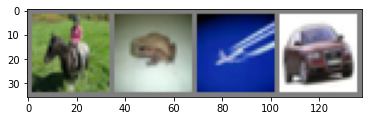

horse  frog plane   car


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))